### Common libraries 

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### Covid data

In [45]:
covid_df = pd.read_csv('./data/state_wise_daily.csv')
covid_df.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [46]:
covid_df = covid_df[['Date','Status', 'TT']]
covid_filtered_df = pd.DataFrame({'dI':covid_df[covid_df['Status']=='Confirmed']['TT'].values, 
                         'Date':covid_df[covid_df['Status']=='Confirmed']['Date'].values,
                        })
covid_filtered_df.head()
# covid_filtered_df.tail()

,dI,Date
0,81,14-Mar-20
1,27,15-Mar-20
2,15,16-Mar-20
3,11,17-Mar-20
4,37,18-Mar-20


### OxCGRT_timeseries_all

In [8]:
def readData(file_name):
    xl_file = pd.read_excel(file_name, sheet_name=None)
    return xl_file

xl_file = readData('./data/OxCGRT_timeseries_all.xlsx')
print(xl_file)

{'stringency_index':     country_code  country_name  01Jan2020  02Jan2020  03Jan2020  04Jan2020  \
0            ABW         Aruba        0.0        0.0        0.0        0.0   
1            AFG   Afghanistan        0.0        0.0        0.0        0.0   
2            AGO        Angola        0.0        0.0        0.0        0.0   
3            ALB       Albania        0.0        0.0        0.0        0.0   
4            AND       Andorra        0.0        0.0        0.0        0.0   
..           ...           ...        ...        ...        ...        ...   
177          VUT       Vanuatu        0.0        0.0        0.0        0.0   
178          YEM         Yemen        0.0        0.0        0.0        0.0   
179          ZAF  South Africa        0.0        0.0        0.0        0.0   
180          ZMB        Zambia        0.0        0.0        0.0        0.0   
181          ZWE      Zimbabwe        0.0        0.0        0.0        0.0   

     05Jan2020  06Jan2020  07Jan2020  08Ja

### Government response index

In [47]:
govt_response_index = xl_file['government_response_index']
govt_response_index_india = govt_response_index[govt_response_index['country_name']=='India']
govt_response_index_india = govt_response_index_india.iloc[:,2:].T
govt_response_index_india = pd.DataFrame({'response':govt_response_index_india[77].values, 
                         'Date':govt_response_index_india[77].index.values,
                        })
govt_response_index_india.head()

,response,Date
0,0.0,01Jan2020
1,0.0,02Jan2020
2,0.0,03Jan2020
3,0.0,04Jan2020
4,0.0,05Jan2020


### Find correlation

From 15 March to 30 November <br>
covid: 15March=1 | 30Nov=261 <br>
response: 15March=74 | 30Nov=334


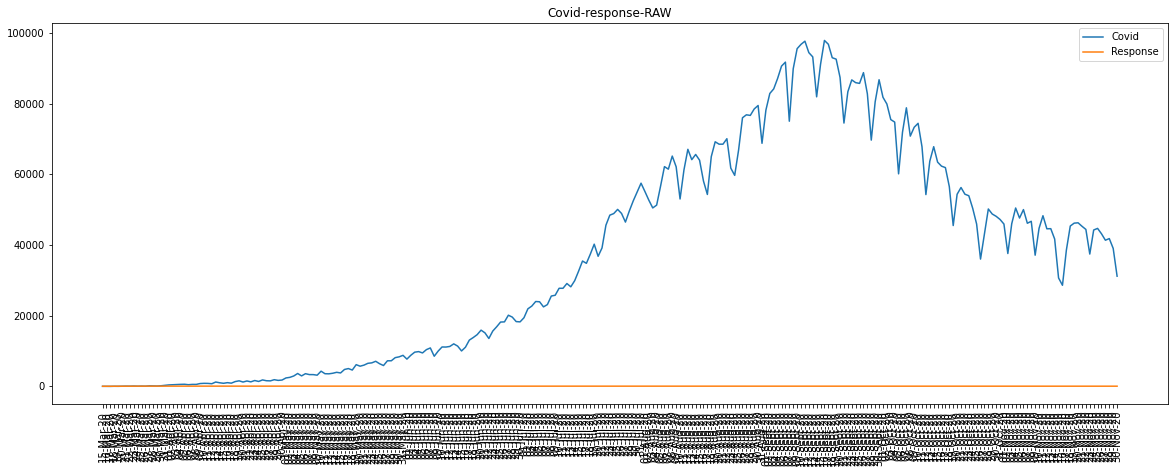

In [59]:
covid_filtered_df_dated = covid_filtered_df.iloc[1:262,:]
govt_response_index_india_dated = govt_response_index_india.iloc[74:335,:]
x = covid_filtered_df_dated['Date'].values
y_covid = covid_filtered_df_dated['dI'].values
y_response = govt_response_index_india_dated['response'].values

fig,ax, = plt.subplots(1,1,figsize=(20,7))
ax.plot(x,y_covid,label='Covid')
ax.plot(x,y_response,label='Response')
plt.xticks(rotation=90)
plt.legend()
plt.title('Covid-response-RAW')
plt.show()

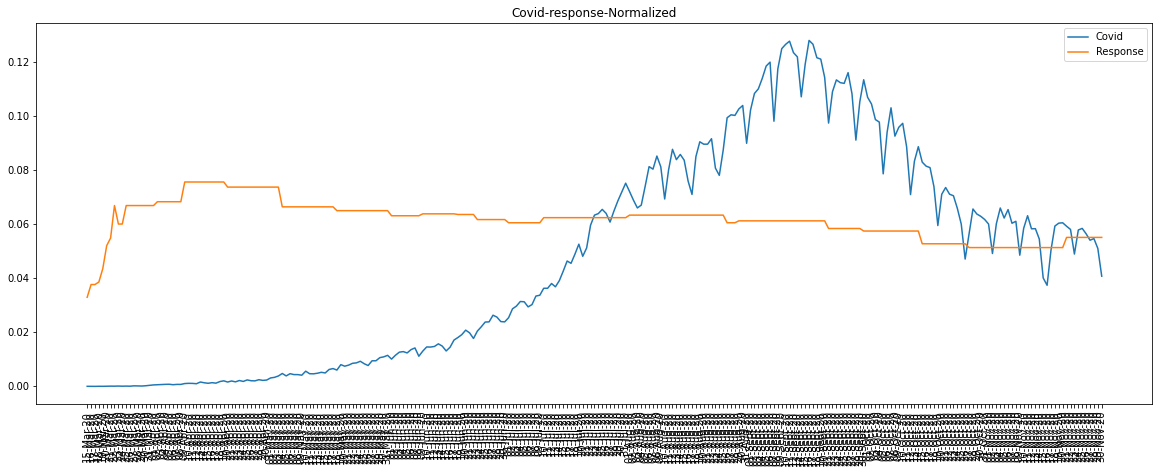

In [62]:
y_covid_normalized = y_covid / np.linalg.norm(y_covid)
y_response_normalized = y_response / np.linalg.norm(y_response)

fig,ax, = plt.subplots(1,1,figsize=(20,7))
ax.plot(x,y_covid_normalized,label='Covid')
ax.plot(x,y_response_normalized,label='Response')
plt.xticks(rotation=90)
plt.legend()
plt.title('Covid-response-Normalized')
plt.show()